In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/gdrive/MyDrive/gender classification/archive (1).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_ds="/content/Training"
test_ds="/content/Validation"


In [ ]:
os.listdir('/content/Training')

['male', 'female']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 


test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
img= train_generator[0]
print(img)

(array([[[[ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         ...,
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ]],

        [[ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         ...,
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ]],

        [[ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         [ 91.      ,  69.      ,  55.      ],
         ...,
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ],
         [100.      ,  63.      ,  54.      ]],

        ...,

        [[ 77.      ,  54.      ,  40.      ],
         [ 77.      ,  54.      ,  40.      

In [ ]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [ ]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [ ]:
print(len(train_generator))
print(len(test_ds))


1470
19


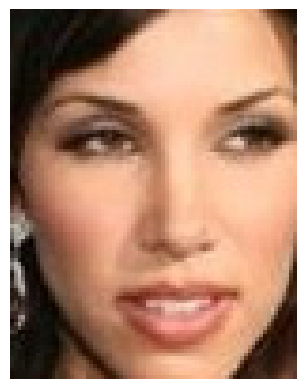

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/Training/female/131435.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from google.colab.patches import cv2_imshow

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=20, activation="softmax"))

In [ ]:
model.summary()

Model: "vgg19_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                       

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history =model.fit(train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
1470/1470 [==============================] - 878s 596ms/step - loss: 0.6363 - accuracy: 0.6374 - val_loss: 0.4888 - val_accuracy: 0.7673
Epoch 2/5
1470/1470 [==============================] - 877s 596ms/step - loss: 0.3743 - accuracy: 0.8291 - val_loss: 0.1453 - val_accuracy: 0.9475
Epoch 3/5
1470/1470 [==============================] - 876s 596ms/step - loss: 0.1591 - accuracy: 0.9420 - val_loss: 0.1355 - val_accuracy: 0.9505
Epoch 4/5
1470/1470 [==============================] - 830s 565ms/step - loss: 0.1346 - accuracy: 0.9518 - val_loss: 0.0967 - val_accuracy: 0.9646
Epoch 5/5
1470/1470 [==============================] - 830s 564ms/step - loss: 0.1247 - accuracy: 0.9563 - val_loss: 0.1045 - val_accuracy: 0.9609


In [ ]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.636325,0.637367,0.488755,0.767276
1,0.374329,0.829097,0.145337,0.947549
2,0.159055,0.942032,0.135493,0.950468
3,0.134566,0.951796,0.096692,0.964632
4,0.124656,0.956327,0.104545,0.960855


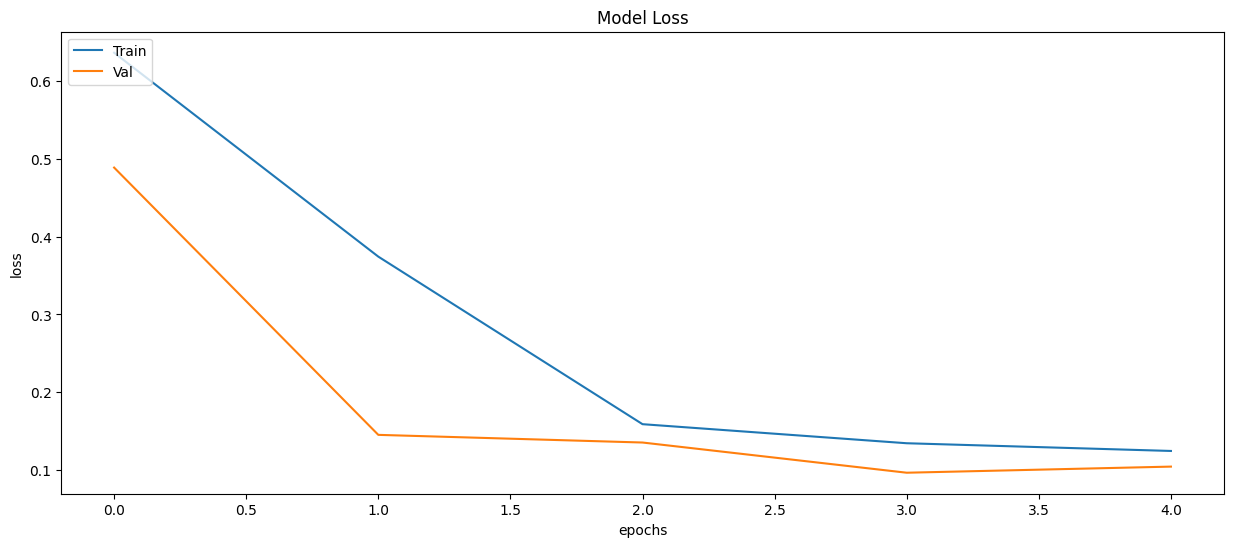

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

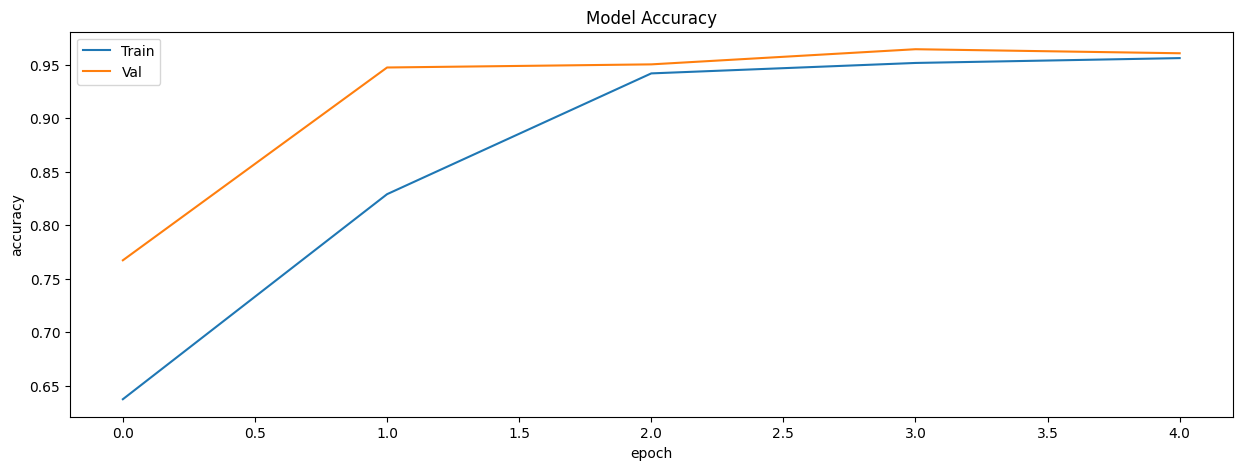

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 53s 144ms/step


In [ ]:
results =model.evaluate(test_generator)

365/365 [==============================] - 54s 148ms/step - loss: 0.1045 - accuracy: 0.9609
